In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
liver_df = pd.read_csv('data/liver_cirrhosis.csv')

liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


## About Dataset

https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification

**Context:**

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

I have manually cleaned the dataset and used synthetic data to increase samples.

**Attribute Information:**

- __N_Days__: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
- __Status__: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- __Drug__: type of drug D-penicillamine or placebo
- __Age__: age in days
- __Sex__: M (male) or F (female)
- __Ascites__: presence of ascites N (No) or Y (Yes)
- __Hepatomegaly__: presence of hepatomegaly N (No) or Y (Yes)
- __Spiders__: presence of spiders N (No) or Y (Yes)
- __Edema__: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- __Bilirubin__: serum bilirubin in [mg/dl]
- __Cholesterol__: serum cholesterol in [mg/dl]
- __Albumin__: albumin in [gm/dl]
- __Copper__: urine copper in [ug/day]
- __Alk_Phos__: alkaline phosphatase in [U/liter]
- __SGOT__: SGOT in [U/ml]
- __Tryglicerides__: triglicerides in [mg/dl]
- __Platelets__: platelets per cubic [ml/1000]
- __Prothrombin__: prothrombin time in seconds [s]
- __Stage__: histologic stage of disease ( 1, 2, or 3 )

## Exploratory Data Analysis (EDA)

In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

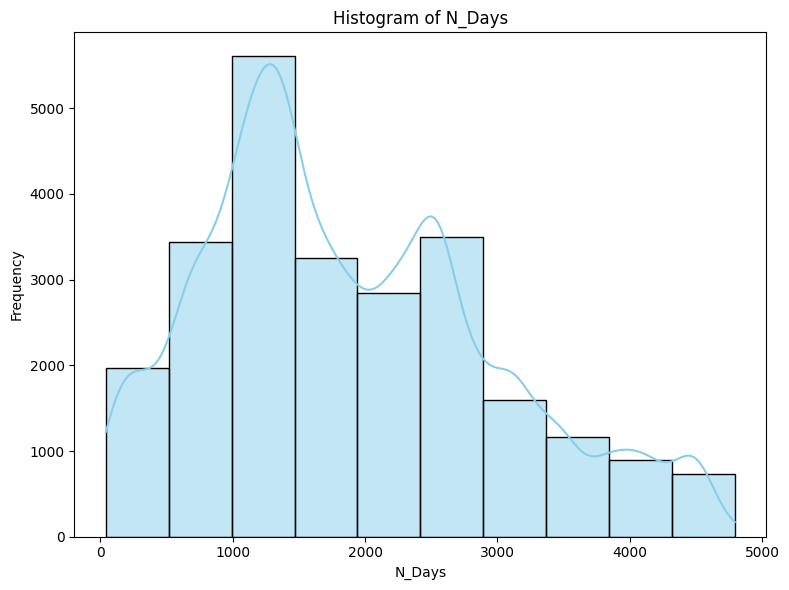

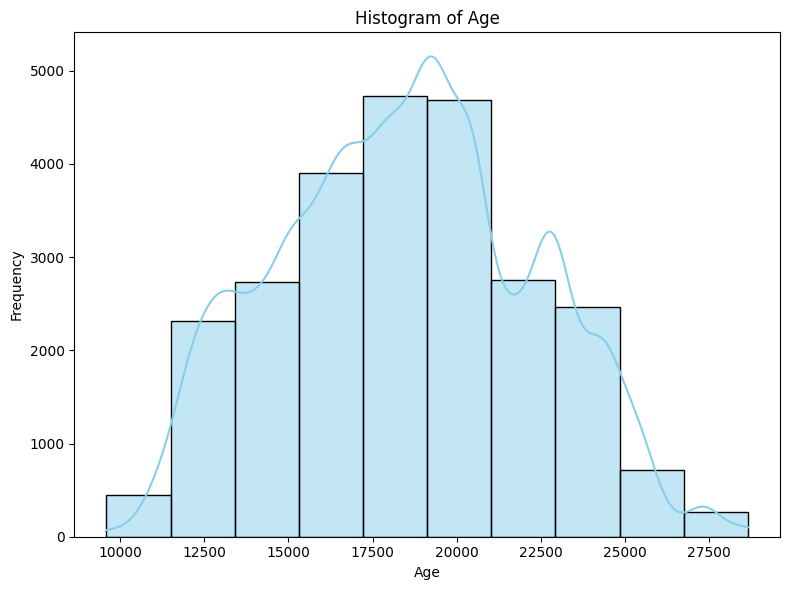

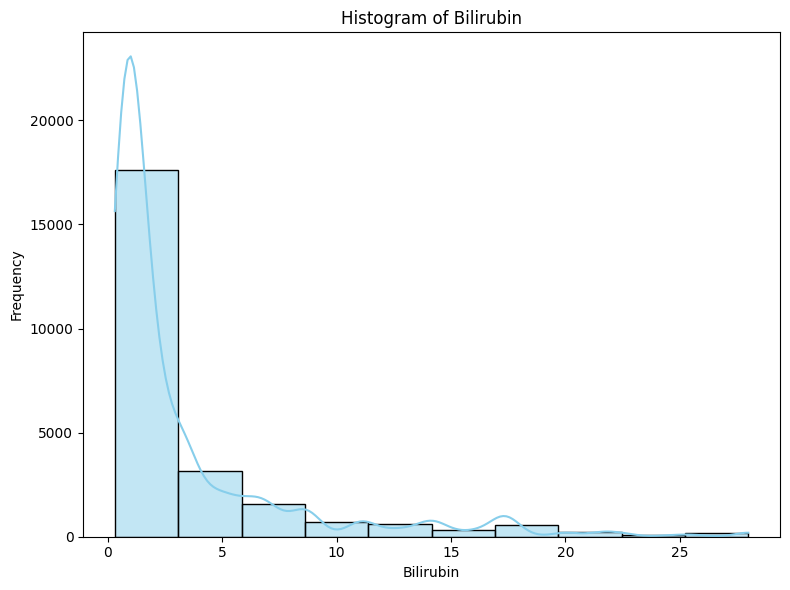

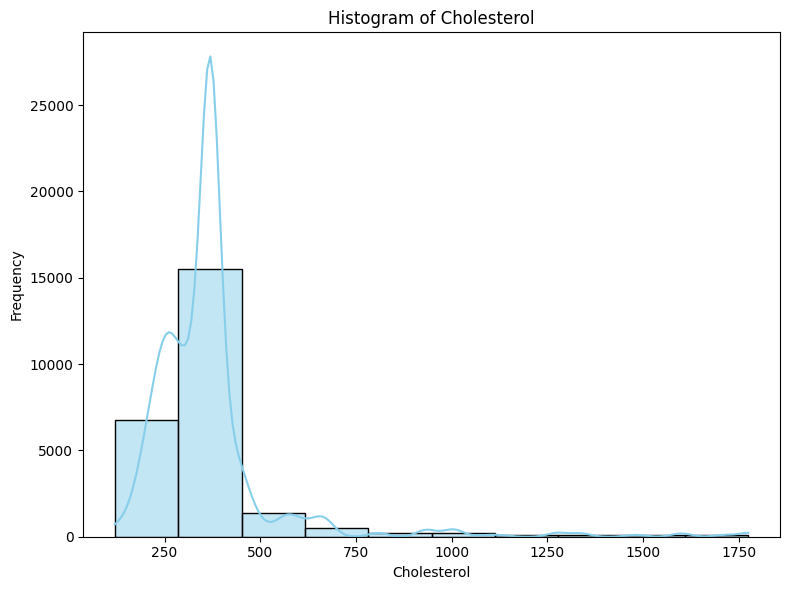

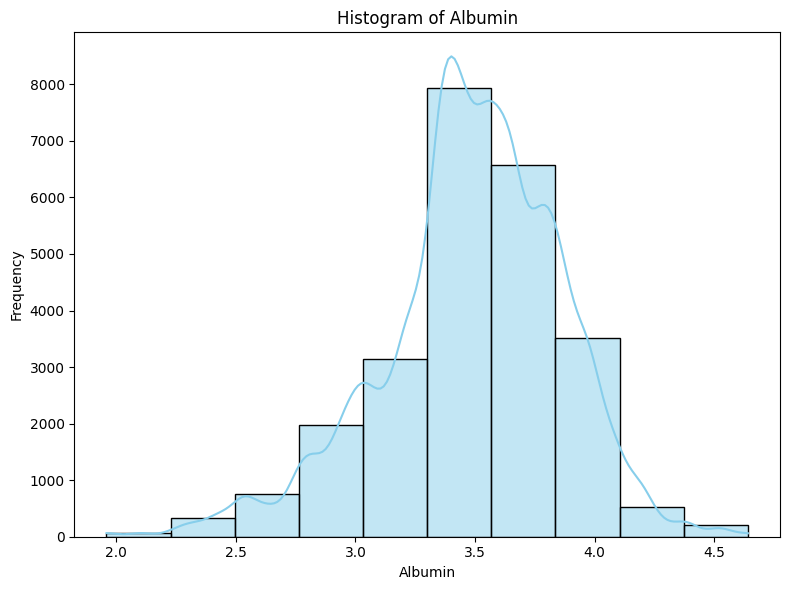

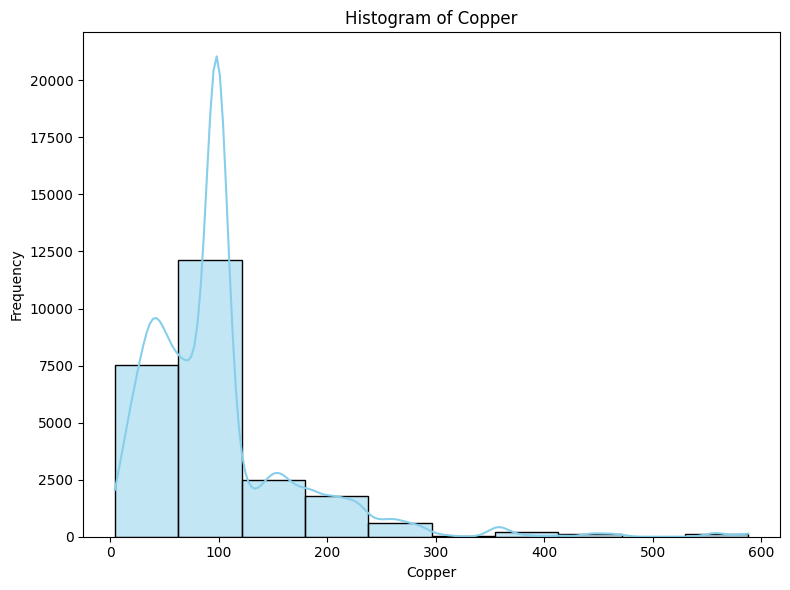

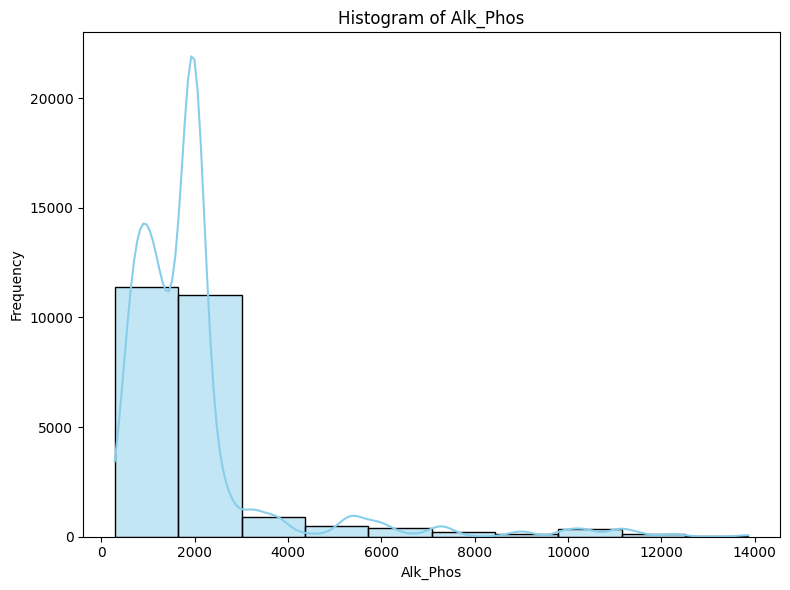

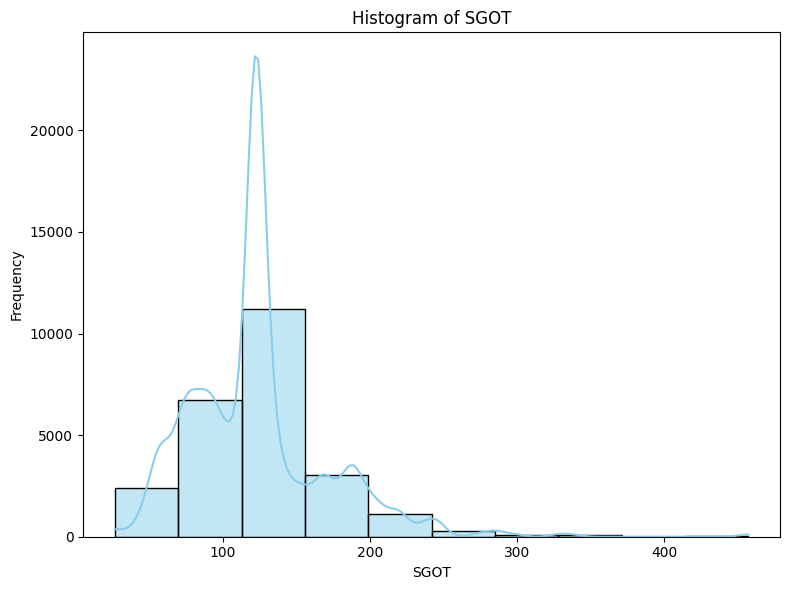

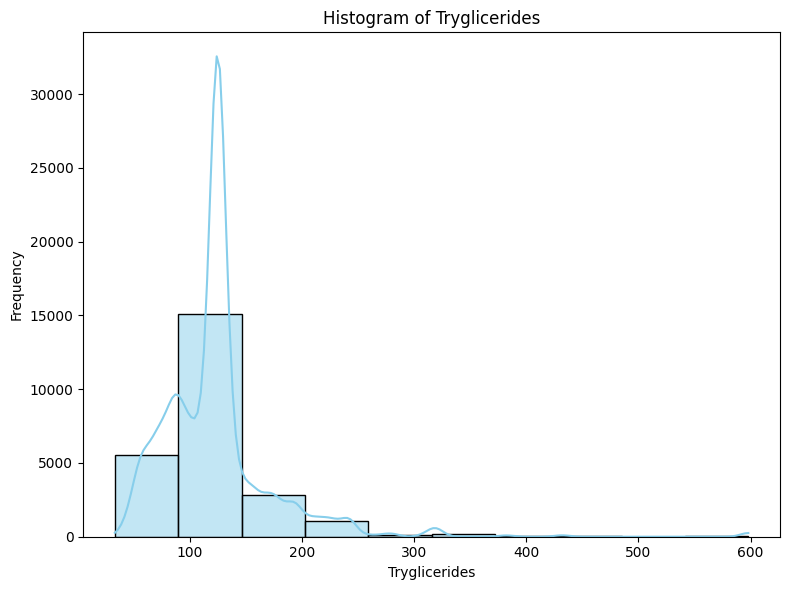

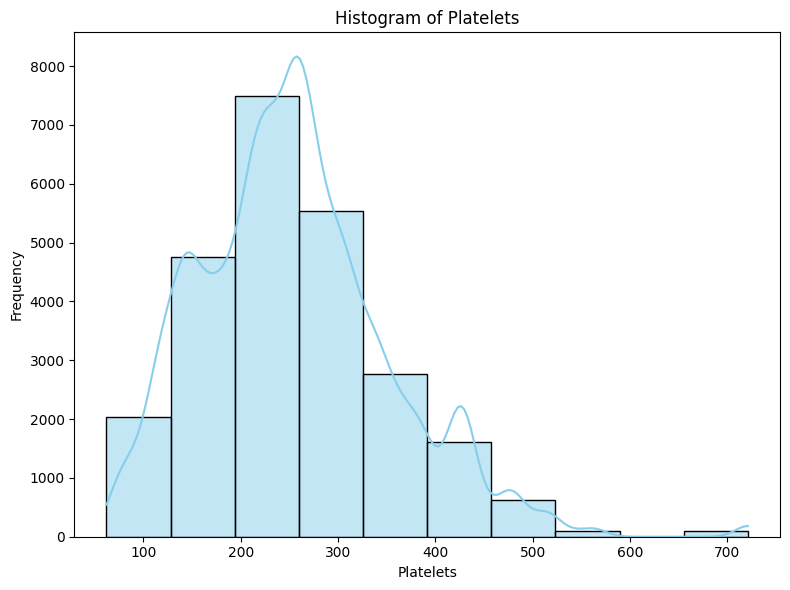

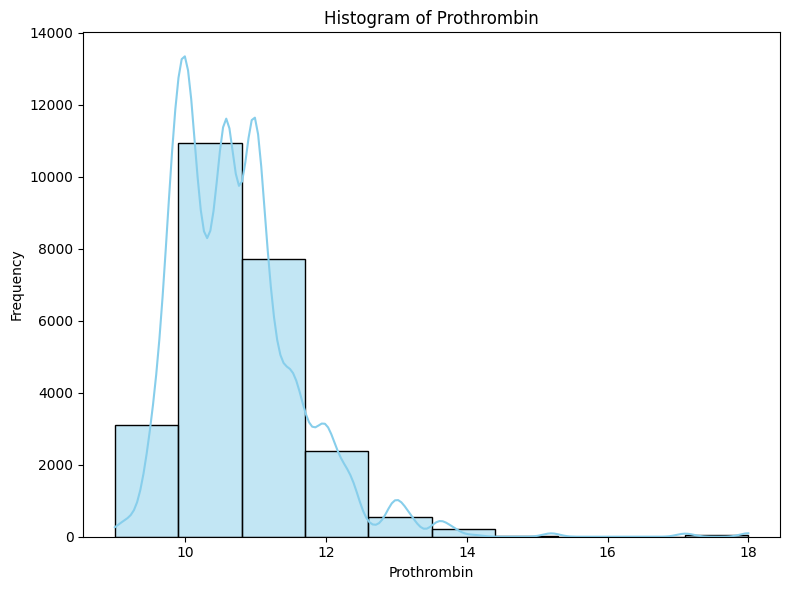

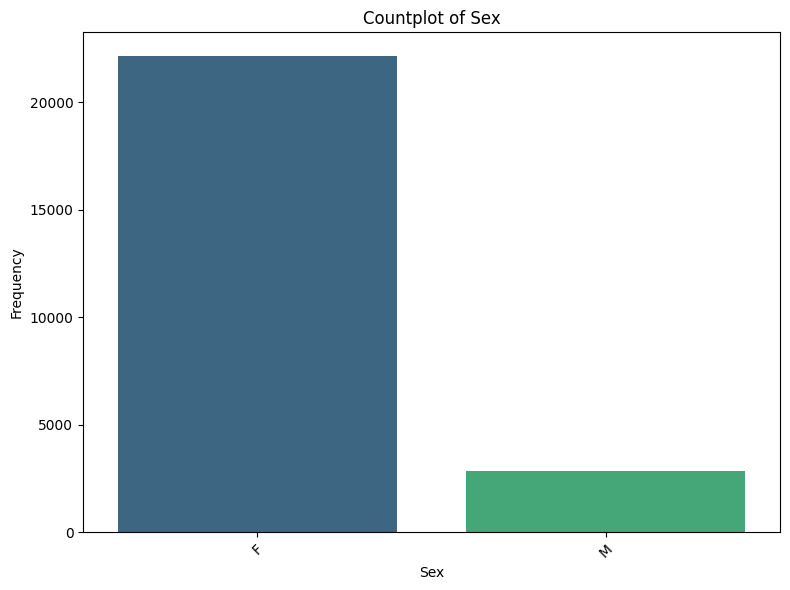

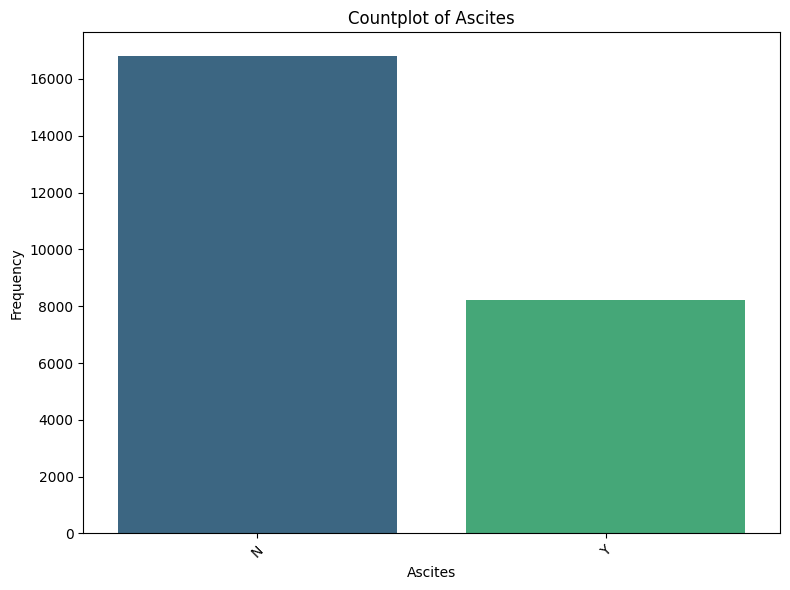

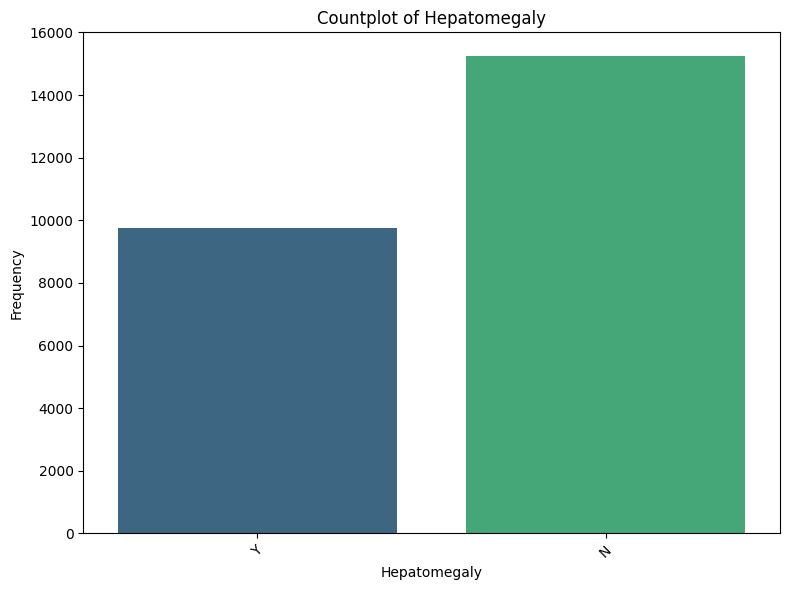

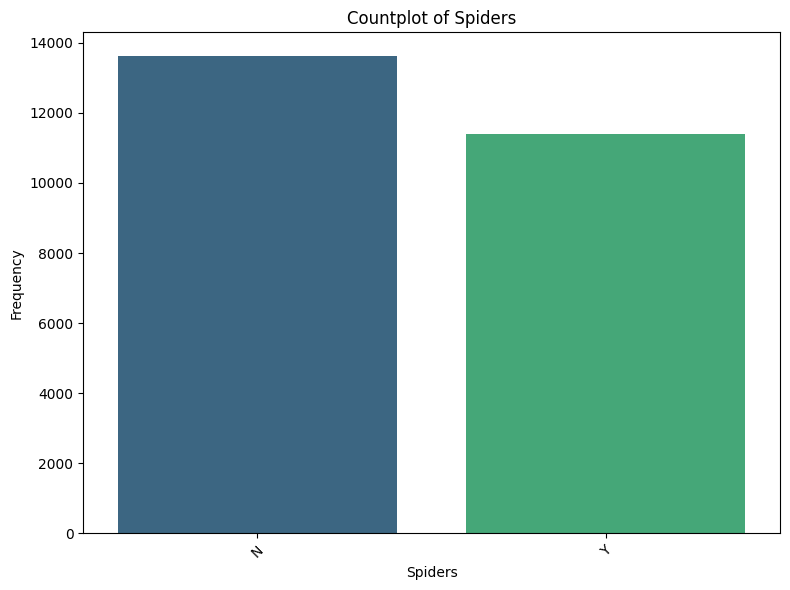

In [4]:
X = liver_df.drop(columns=['Stage'])
y = liver_df['Stage']

num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

binary_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Membuat histogram untuk kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(liver_df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

for col in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=liver_df,hue=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [5]:
liver_df['Sex'] = liver_df['Sex'].map({'M': 0, 'F': 1})
liver_df['Ascites'] = liver_df['Ascites'].map({'N': 0, 'Y': 1})
liver_df['Hepatomegaly'] = liver_df['Hepatomegaly'].map({'N': 0, 'Y': 1})
liver_df['Spiders'] = liver_df['Spiders'].map({'N': 0, 'Y': 1})
liver_df['Edema'] = liver_df['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
liver_df['Status'] = liver_df['Status'].astype('category').cat.codes
liver_df['Drug'] = liver_df['Drug'].astype('category').cat.codes

## Drop Duplicate Rows

In [6]:
liver_df.duplicated().sum()

15361

In [7]:
liver_df.drop_duplicates(inplace=True)

print("DataFrame after removing duplicates")
liver_df.info()

DataFrame after removing duplicates
<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 24992
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         9639 non-null   int64  
 1   Status         9639 non-null   int8   
 2   Drug           9639 non-null   int8   
 3   Age            9639 non-null   int64  
 4   Sex            9639 non-null   int64  
 5   Ascites        9639 non-null   int64  
 6   Hepatomegaly   9639 non-null   int64  
 7   Spiders        9639 non-null   int64  
 8   Edema          9639 non-null   int64  
 9   Bilirubin      9639 non-null   float64
 10  Cholesterol    9639 non-null   float64
 11  Albumin        9639 non-null   float64
 12  Copper         9639 non-null   float64
 13  Alk_Phos       9639 non-null   float64
 14  SGOT           9639 non-null   float64
 15  Tryglicerides  9639 non-null   float64
 16  Platelets      9639 non-null   float64
 17  Prothrombin    9639 

## Outliers

Removing outliers manually

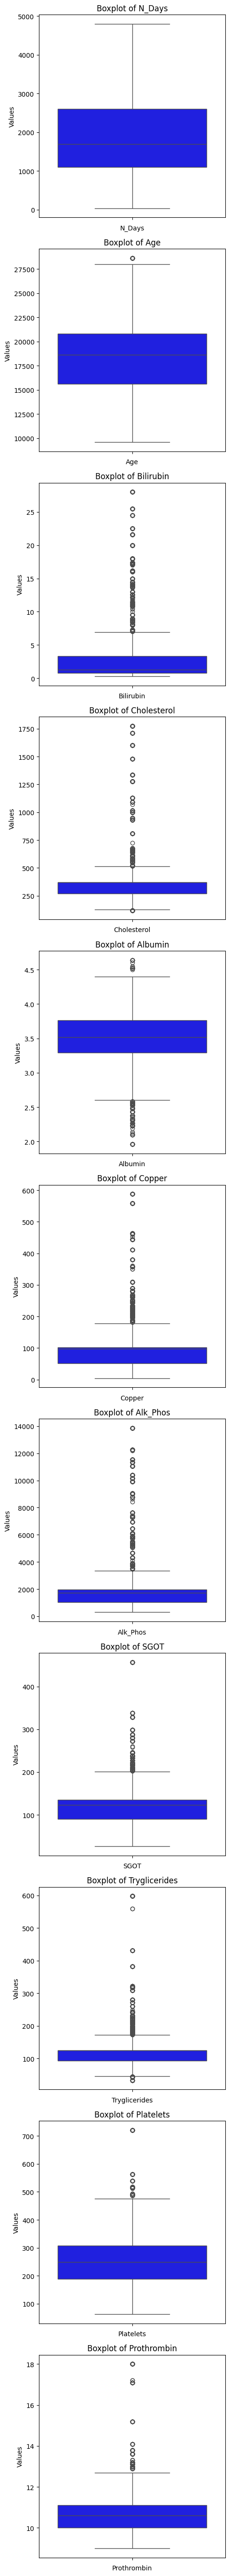

In [8]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(5, 5 * len(num_cols)))

for i, feature in enumerate(num_cols):
    sns.boxplot(liver_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [9]:
# N_Days <= 3000
# Age <= 22500
# Bilirubin <= 5
# Cholesterol <= 500
# Albumin >= 3 && Albumin <= 4
# Copper <= 400
# Alk_Phos <= 2000
# SGOT <= 350
# Tryglicerides <= 400
# Platelets <= 300
# Prothombin <= 16

liver_df = liver_df[liver_df['N_Days'] <= 3000]
liver_df = liver_df[liver_df['Age'] <= 22500]
liver_df = liver_df[liver_df['Bilirubin'] <= 5]
liver_df = liver_df[liver_df['Cholesterol'] <= 500]
liver_df = liver_df[(liver_df['Albumin'] >= 3) & (liver_df['Albumin'] <= 4)]
liver_df = liver_df[liver_df['Copper'] <= 400]
liver_df = liver_df[liver_df['Alk_Phos'] <= 2000]
liver_df = liver_df[liver_df['SGOT'] <= 350]
liver_df = liver_df[liver_df['Tryglicerides'] <= 400]
liver_df = liver_df[liver_df['Platelets'] <= 300]
liver_df = liver_df[liver_df['Prothrombin'] <= 16]

liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1230,0,1,19724,0,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
3,2090,2,1,16467,1,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,2,1,21699,1,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
9,1012,2,1,22280,0,1,0,1,1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.0,10.1,3
13,2504,0,1,18263,1,1,0,1,0,0.5,120.000000,3.41,53.000000,804.000000,110.050000,52.000000,277.0,10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24722,2332,0,0,14317,1,1,1,1,2,0.7,187.000000,3.48,41.000000,654.000000,120.900000,98.000000,254.0,11.0,3
24753,2106,0,1,17080,1,0,1,0,0,1.1,259.000000,3.31,229.000000,1104.000000,79.050000,79.000000,142.0,11.7,3
24778,1264,0,1,21600,1,0,0,1,0,0.7,369.510563,3.55,97.648387,1982.655769,122.556346,124.702128,71.0,13.6,3
24885,2769,2,1,17323,1,0,0,0,0,1.1,466.000000,3.91,84.000000,1787.000000,328.600000,185.000000,261.0,10.0,2


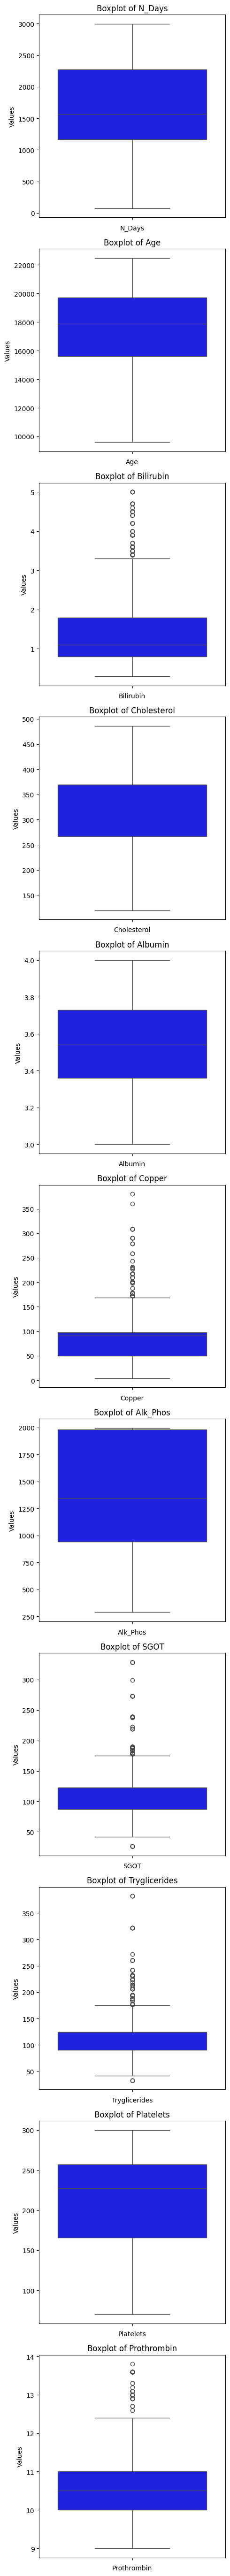

In [10]:
# Create subplots 
fix, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(5, 5 * len(num_cols)))

# Create boxplot for each column
for i, feature in enumerate(num_cols):
    sns.boxplot(liver_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [11]:
liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1230,0,1,19724,0,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
3,2090,2,1,16467,1,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,2,1,21699,1,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
9,1012,2,1,22280,0,1,0,1,1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.0,10.1,3
13,2504,0,1,18263,1,1,0,1,0,0.5,120.000000,3.41,53.000000,804.000000,110.050000,52.000000,277.0,10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24722,2332,0,0,14317,1,1,1,1,2,0.7,187.000000,3.48,41.000000,654.000000,120.900000,98.000000,254.0,11.0,3
24753,2106,0,1,17080,1,0,1,0,0,1.1,259.000000,3.31,229.000000,1104.000000,79.050000,79.000000,142.0,11.7,3
24778,1264,0,1,21600,1,0,0,1,0,0.7,369.510563,3.55,97.648387,1982.655769,122.556346,124.702128,71.0,13.6,3
24885,2769,2,1,17323,1,0,0,0,0,1.1,466.000000,3.91,84.000000,1787.000000,328.600000,185.000000,261.0,10.0,2


## Feature Correlation

Get the Correlation between each feature with the Stage

In [12]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2886 entries, 1 to 24892
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         2886 non-null   int64  
 1   Status         2886 non-null   int8   
 2   Drug           2886 non-null   int8   
 3   Age            2886 non-null   int64  
 4   Sex            2886 non-null   int64  
 5   Ascites        2886 non-null   int64  
 6   Hepatomegaly   2886 non-null   int64  
 7   Spiders        2886 non-null   int64  
 8   Edema          2886 non-null   int64  
 9   Bilirubin      2886 non-null   float64
 10  Cholesterol    2886 non-null   float64
 11  Albumin        2886 non-null   float64
 12  Copper         2886 non-null   float64
 13  Alk_Phos       2886 non-null   float64
 14  SGOT           2886 non-null   float64
 15  Tryglicerides  2886 non-null   float64
 16  Platelets      2886 non-null   float64
 17  Prothrombin    2886 non-null   float64
 18  Stage       

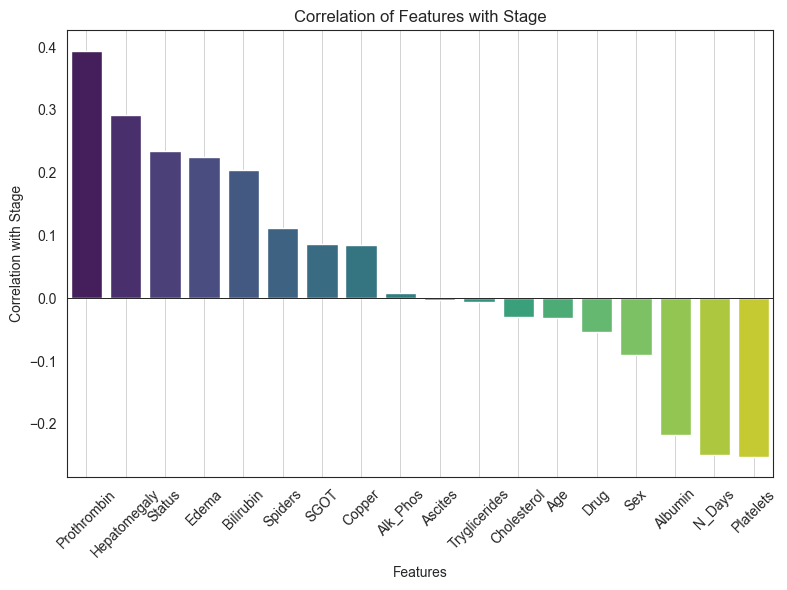

In [13]:
# calculate the correlation matrix with CIRRHOSIS
liver_corr = liver_df.corr()["Stage"]
liver_corr = liver_corr.drop("Stage", axis=0).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.barplot(x=liver_corr.index, hue=liver_corr.index, y=liver_corr, palette='viridis', legend=False)

plt.xlabel("Features")
plt.ylabel("Correlation with Stage")
plt.title("Correlation of Features with Stage")

plt.xticks(rotation=45)

plt.axhline(0, color="k", linewidth=0.6)

plt.grid(True, axis="x", lw=0.6)

plt.tight_layout()

plt.show()

## Heatmap

Correlation between each features

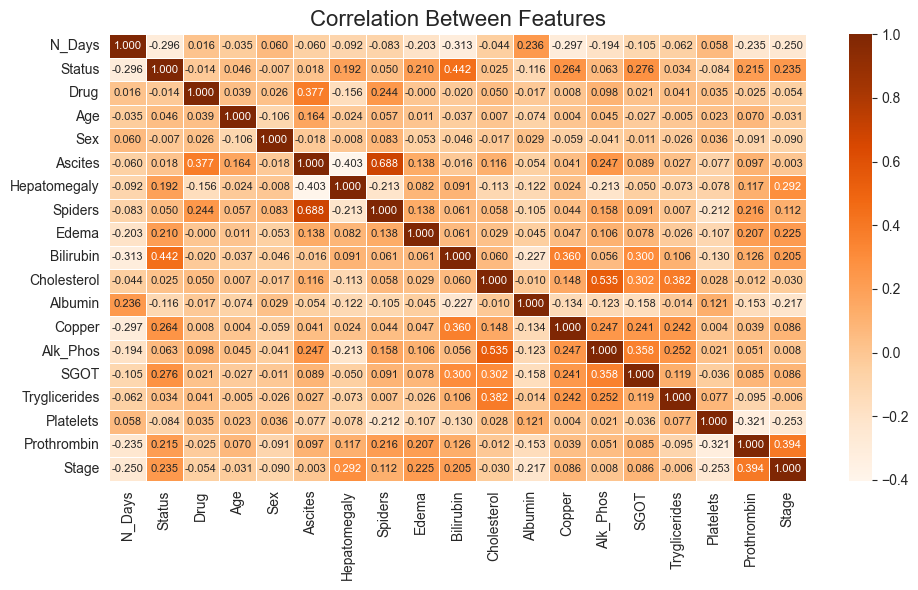

In [14]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.set_style("white")

# Generate the heatmap
sns.heatmap(liver_df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8})
plt.title("Correlation Between Features", fontsize=16)
plt.tight_layout()
plt.show()


# Data Splitting

Splits the data into training and testing sets. It uses a fixed random seed for reproducibility. The proportion of data allocated for training and testing is set to 0.80 and 0.20, respectively. 

In this code ensures that the dataset is divided into training and testing sets with the specified proportions, considering both 1 or 2 or 3

In [37]:
random_seed = 15
np.random.seed(random_seed)

train_proporation = 0.8
test_proporation = 0.2

category_1 = liver_df[liver_df['Stage'] == 1]
category_2 = liver_df[liver_df['Stage'] == 2]
category_3 = liver_df[liver_df['Stage'] == 3]

msk_category_1 = np.random.rand(len(category_1)) < train_proporation
msk_category_2 = np.random.rand(len(category_2)) < train_proporation
msk_category_3 = np.random.rand(len(category_3)) < train_proporation

# splitting
category_1_train = category_1[msk_category_1]
category_2_train = category_2[msk_category_2]
category_3_train = category_3[msk_category_3]

category_1_test = category_1[~msk_category_1]
category_2_test = category_2[~msk_category_2]
category_3_test = category_3[~msk_category_3]

# combining
train_df = pd.concat([category_1_train, category_2_train, category_3_train])
test_df = pd.concat([category_1_test, category_2_test, category_3_test])

In [38]:
test_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
4,2105,2,1,21699,1,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
104,2834,0,1,18993,0,1,0,1,0,0.9,269.000000,3.14,97.648387,1441.000000,165.850000,68.000000,191.0,12.3,1
147,1343,0,0,16929,1,0,0,0,0,1.6,369.510563,3.48,97.648387,1982.655769,122.556346,124.702128,252.0,10.0,1
159,2834,0,1,18993,1,1,0,1,0,0.9,369.510563,3.14,97.648387,1982.655769,122.556346,124.702128,191.0,12.3,1
234,2286,2,1,16094,1,0,0,0,0,1.8,369.510563,3.64,97.648387,1982.655769,122.556346,124.702128,271.0,10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21322,1682,2,1,17874,1,0,1,0,0,0.9,376.000000,3.86,200.000000,1015.000000,83.700000,154.000000,298.0,10.0,3
21526,1560,0,1,14610,1,1,0,1,0,0.9,369.510563,3.50,97.648387,1982.655769,122.556346,124.702128,117.0,10.9,3
22804,304,2,1,21600,1,0,0,1,0,3.6,236.000000,3.52,94.000000,1024.000000,82.150000,95.000000,71.0,13.6,3
22865,368,0,1,16688,1,0,1,0,0,0.3,172.000000,3.49,18.000000,558.000000,71.300000,96.000000,244.0,10.6,3


# Data Preparation

In [39]:
y_train = train_df['Stage']
X_train = train_df.drop('Stage', axis=1)

y_test = test_df['Stage']
X_test = test_df.drop('Stage', axis=1)

# Feature Scaling

This code snippet standardizes the numerical features using `StandardScaler`. It is particularly beneficial for improving the performance of machine learning algorithms, especially those sensitive to feature scales.

In [40]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

# Modeling

This code snippet trains a Decision Tree model using the training data (X_train and y_train). It then makes predictions on the testing data (X_test) and evaluates the model’s performance using various metrics.

- **Accuracy** shows how often a classification ML model is correct overall. 
- **Precision** shows how often an ML model is correct when predicting the target class.
- **Recall** shows whether an ML model can find all objects of the target class. 
- **F1 Score**: F1 score is the harmonic mean of precision and recall and provides a balance between them.

For more details check this link [here](https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,objects%20of%20the%20target%20class.)

Accuracy Score: 0.55

Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.60      0.50       157
           2       0.62      0.49      0.54       241
           3       0.62      0.60      0.61       184

    accuracy                           0.55       582
   macro avg       0.56      0.56      0.55       582
weighted avg       0.57      0.55      0.55       582



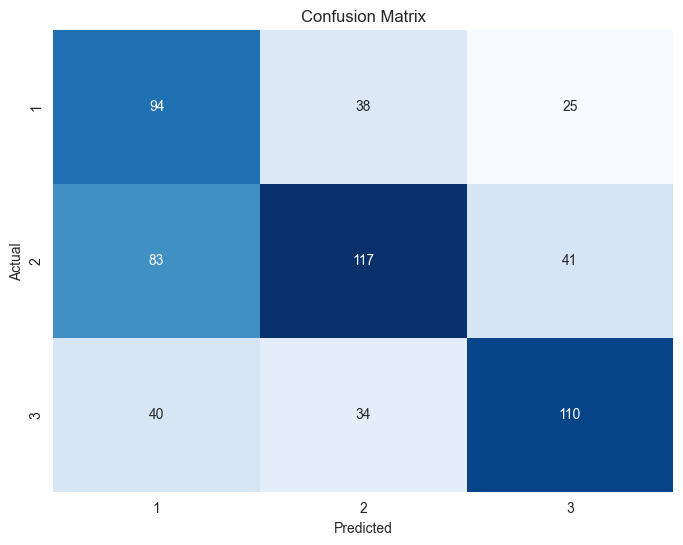

In [41]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# i want to show accuration score
print("Accuracy Score: {:.2f}".format(naive_bayes.score(X_test, y_test)))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()